In [1]:
import pandas as pd
import numpy as np

# I. Definition

### &nbsp; A. Domain

&nbsp; &nbsp; The domain of the data is approximately 400 rows of salaried data from Indeed collected from a data science search done 6 months ago.

### &nbsp; B. Problem

&nbsp; &nbsp; Our goal is to predict what parameters will predict either a high or low salary earner.

### &nbsp; C. Metric

&nbsp; &nbsp; Because we are predicting a categorical target, we want to use accuracy rate as our metric.

&nbsp; &nbsp; I will also look at this data using the actual integer value of the offered salary (because, why not?)

In [2]:
df = pd.read_csv('../assets/indeed-scraped-job-postings.csv')
df.head(5)

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
city             413 non-null object
company          413 non-null object
salary           413 non-null object
summary          413 non-null object
title            413 non-null object
parsed_salary    406 non-null float64
dtypes: float64(1), object(5)
memory usage: 19.4+ KB


In [4]:
df[df['parsed_salary'].isnull()]

,city,company,salary,summary,title,parsed_salary
41,Seattle,Arne Software,$100 a day,The successful candidate MUST have a PhD in St...,Data Scientist,NaN
123,Chicago,Real Staffing,$100 - $140 a day,Candidate is responsible to provide Big Data r...,IT Solution Architect,NaN
124,Chicago,RealIT,$100 - $140 a day,Candidate is responsible to provide Big Data r...,IT Solution Architect,NaN
189,New+York,Selby Jennings,$650 - $900 a day,Senior Quantitative Developer/Machine Learning...,Senior Quantitative/Machine Learning - Contract,NaN
310,Los+Angeles,Insight Recruiting,$140 - $160 a day,Fixed Income Research Analyst Research analyst...,Fixed Income Research Analyst,NaN
367,San+Francisco,"Projas Technologies, LLC",$70 - $95 a day,BA/BS degree in Computer Science preferred wit...,Senior Data Scientist (FTE or Contract to hire),NaN
389,San+Francisco,Global Placement Firm,$130 - $140 a day,This role is suited for a self-directed Senior...,Senior Web Research Scientist,NaN


In [5]:
# not intested in non-salaried data. doesn't offer benefits, so would need to be adjusted beyond just the daily 
# contract payment. I don't want to deal with that so I'll drop them since it's only 7 entries 
df = df.dropna()

# Cleaning and Making Sense of the Data

#### &nbsp; I'll periodically come up to this section when I have more categorization ideas or want to clean the data more.

In [6]:
for i in df['title']:
    for letter in i:
        df['title'] = df['title'].apply(lambda letter: letter.lower())

In [7]:
df['city'] = df['city'].str.replace('+','_')
# wanted to replace some stuff in the title that doesn't impact keywords
df['title'] = df['title'].str.replace('.',' ')
df['title'] = df['title'].str.replace('(',' ')
df['title'] = df['title'].str.replace(')',' ')
df['title'] = df['title'].str.replace(',',' ')
df['title'] = df['title'].str.replace(':',' ')
df['title'] = df['title'].str.replace('\\',' ')
df['title'] = df['title'].str.replace('/',' ')
df['title'] = df['title'].str.replace('&',' ')
df['title'] = df['title'].str.replace('-',' ')
df['title'] = df['title'].str.replace('data scientist','data_scientist')
df['title'] = df['title'].str.replace('data science','data_scientist')
df['title'] = df['title'].str.replace('data scis','data_scientist')
df['title'] = df['title'].str.replace('front end','front_end')
df['title'] = df['title'].str.replace('machine learning', 'machine_learning')
df['title'] = df['title'].str.replace('natural language processing', 'nlp')
df['title'] = df['title'].str.replace('sr', 'senior')
df['title'] = df['title'].str.replace('snr', 'senior')
df['title'] = df['title'].str.replace('dir ', 'director ')
df['title'] = df['title'].str.replace('big', 'big_data ')
df['title'] = df['title'].str.replace('statistical', 'statistics')

# wanted to replace some stuff in the summary that doesn't impact keywords
df['summary'] = df['summary'].str.replace('.','')
df['summary'] = df['summary'].str.replace('(','')
df['summary'] = df['summary'].str.replace(')','')
df['summary'] = df['summary'].str.replace(',','')

In [8]:
title_words = df['title'].ravel()
title_words

array(['statistician  gs 1350 12  deu perm ds ',
       'interdisciplinary cartographer geographer   gs 1370 0150 12   ',
       'financial data_scientist', 'senior research analyst',
       'animal care i', 'assistant research scientist   radars',
       'statistics research specialist',
       'statistics research scientist   radars',
       'regulatory   compliance manager',
       'software engineer data_scientist',
       'global marketing manager   ingredient and school foodservice',
       'geologist gs 1350 07 09  deu   term   jg ',
       'professional research assistant   data manager',
       'professional research assistant   tissue bank coordinator da   ',
       'platform developer geospatial big_data  data  python ',
       'professional research assistant   clinical research coordina   ',
       'devops engineer', 'data_scientist programmer specialist',
       'senior deep learning data_scientist',
       'robotics software engineer  involves machine_learning  ai  a   '

In [9]:
title_word_list = []
for word in title_words:
    final_word = word.split(' ')
    title_word_list.append(final_word)

title_word_dict = {}
for alist in title_word_list:
    for word in alist:
        if word in title_word_dict:
            title_word_dict[word] += 1
        else:
            title_word_dict[word.lower()] = 1

print sorted(title_word_dict.items())
# title_word_dict_large_vals = 
print len(title_word_dict)

[('', 471), ('#23654', 1), ('$10+', 1), ('$100b', 1), ('$115k', 1), ('$150k', 1), ('$200k+benefits', 1), ('$5b', 1), ('0150', 1), ('07', 1), ('0856', 1), ('09', 2), ('1', 1), ('10', 1), ('11', 1), ('12', 2), ('1350', 2), ('1370', 1), ('14', 1), ('21', 1), ('3', 1), ('34114', 1), ('4', 2), ('60k', 1), ('735195', 1), ('736895', 1), ('80k', 1), ('a', 4), ('academic', 1), ('acce', 1), ('account', 1), ('accountant', 1), ('actuary', 1), ('administrat', 1), ('administrative', 1), ('administrator', 4), ('adolescent', 1), ('advanced', 1), ('affairs', 1), ('ai', 1), ('algo', 1), ('aml', 1), ('an', 1), ('analysis', 8), ('analyst', 84), ('analysts', 1), ('analyst\xc2\xa0', 1), ('analytics', 7), ('and', 10), ('angula', 1), ('animal', 1), ('app', 1), ('applications', 1), ('appsw', 1), ('ar', 1), ('architect', 3), ('area', 1), ('asc', 1), ('assessment', 1), ('asset', 1), ('assistant', 13), ('associate', 4), ('asst', 1), ('assurance', 4), ('ast', 1), ('astrophysicist', 1), ('at', 3), ('audit', 1), ('a

In [10]:
title_word_dict_mult_occurances = {}
for key,value in title_word_dict.items():
    if value > 1:
        title_word_dict_mult_occurances[key] = value

In [11]:
title_word_dict_mult_occurances

{'': 471,
 '09': 2,
 '12': 2,
 '1350': 2,
 '4': 2,
 'a': 4,
 'administrator': 4,
 'analysis': 8,
 'analyst': 84,
 'analytics': 7,
 'and': 10,
 'architect': 3,
 'assistant': 13,
 'associate': 4,
 'assurance': 4,
 'at': 3,
 'behavioral': 3,
 'big_data': 10,
 'bureau': 3,
 'business': 9,
 'c++': 2,
 'care': 2,
 'certifying': 2,
 'chain': 2,
 'chemist': 2,
 'child': 2,
 'clinical': 6,
 'cloud': 2,
 'compensation': 2,
 'computer': 3,
 'control': 3,
 'coordinator': 4,
 'customer': 2,
 'd': 3,
 'data': 47,
 'data_scientist': 116,
 'data_scientists': 2,
 'deep': 4,
 'department': 3,
 'deputy': 2,
 'deu': 3,
 'dev': 2,
 'developer': 11,
 'development': 3,
 'devops': 3,
 'digital': 3,
 'director': 13,
 'disease': 2,
 'doctoral': 2,
 'econometrics': 2,
 'electronics': 3,
 'engineer': 44,
 'engineering': 5,
 'entry': 2,
 'environmental': 2,
 'equity': 7,
 'experience': 3,
 'fellow': 2,
 'financial': 5,
 'firm': 2,
 'food': 3,
 'for': 9,
 'front_end': 2,
 'full': 4,
 'fund': 3,
 'global': 4,
 'grad

In [12]:
from stop_words import get_stop_words

stop_words_uni = get_stop_words('en')

stop_words = [x.encode('UTF8') for x in stop_words_uni]

stop_words.append(' ')
stop_words.append('')
stop_words.append('i')
stop_words.append('ii')
stop_words.append('iii')
stop_words.append('\xe2\x80\x93')
stop_words.append('food')
stop_words.append('09')
stop_words.append('12')
stop_words.append('1350')
stop_words.append('4')
stop_words.append('s')
stop_words.append('|')

stop_words_set = set(stop_words)

In [13]:
stop_words_set

{'',
 ' ',
 '09',
 '12',
 '1350',
 '4',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'food',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'ii',
 'iii',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 's',
 's

In [14]:
for i in title_word_dict_mult_occurances.keys():
    if i == 'company' or i == 'title':
        pass
    elif i in stop_words_set:
        pass
    else:
        df[i] = df['title'].apply(lambda x: 1 if i in x.split(' ') else 0)

In [15]:
df['company'].unique()

array(['Department Of The Interior', 'Mental Health Center of Denver',
       'Denver Public Schools', 'University of Colorado', 'Denver Health',
       'Computer Enterprises, Inc.', 'Potatoes USA', 'DigitalGlobe',
       'Fahrenheit IT', 'TechTank Staffing & Consulting Solutions',
       'All-In Analytics', 'Emoters Robotics', 'Myriad Development',
       'Roland & Associates', 'JE Compliance', 'Providence Partners',
       'Pullskill Technologies', 'Harvey Nash USA',
       'Seattle Pacific University', 'Rakuten, Inc.',
       'University of Washington School of Medicine',
       'Department of the Navy', 'King County', 'State of Washington',
       'Department Of Veterans Affairs', 'Washington State Government',
       'Job Brokers, Inc.', 'Juno Search Partners', 'Jobspring Partners',
       'TEEMA Solutions Group', 'Aavalar Consulting, Inc.',
       'Analytic Recruiting', 'The McManness Group',
       'Philadelphia Works, Inc.', 'International Flavors',
       'JUNO Search Partners

In [16]:
def categorize_public_v_private(x):
    x = x.lower()
    if 'university' in x or 'school' in x or 'city' in x or 'education' in x \
    or 'department' in x or 'dept' in x or 'state' in x or 'government' in x \
    or 'denver' in x or 'colorado' in x or 'college' in x or 'county' in x \
    or 'philadelphia' in x or 'diego' in x or 'nyc' in x or 'housing' in x \
    or 'boston' in x or 'disease control' in x or 'suny' in x:
        return 1
    else:
        return 0

df['public_sector'] = df['company'].apply(categorize_public_v_private)

In [17]:
priv_pub_check_true = df[df['public_sector'] == 1.]
priv_pub_check_true['company'].unique()

array(['Department Of The Interior', 'Mental Health Center of Denver',
       'Denver Public Schools', 'University of Colorado', 'Denver Health',
       'Seattle Pacific University',
       'University of Washington School of Medicine',
       'Department of the Navy', 'King County', 'State of Washington',
       'Department Of Veterans Affairs', 'Washington State Government',
       'Philadelphia Works, Inc.', 'Bullis Charter School',
       'Carnegie Mellon University', 'The University of Pittsburgh',
       'University of Miami', 'UC San Diego',
       'Environmental Conservation, Department of',
       'New York State Senate', 'DEPT OF ENVIRONMENT PROTECTION',
       'NYC Department of Buildings', 'SUNY Oswego', 'City of New York',
       'DEPT OF HEALTH/MENTAL HYGIENE', 'DEPARTMENT OF SANITATION',
       'SUNY ESF', 'HRA/DEPT OF SOCIAL SERVICES',
       'Research Foundation of The City University of New...',
       'POLICE DEPARTMENT', 'Health, Department of', 'Columbia University

In [18]:
priv_pub_check_false = df[df['public_sector'] == 0.]
priv_pub_check_false['company'].unique()

array(['Computer Enterprises, Inc.', 'Potatoes USA', 'DigitalGlobe',
       'Fahrenheit IT', 'TechTank Staffing & Consulting Solutions',
       'All-In Analytics', 'Emoters Robotics', 'Myriad Development',
       'Roland & Associates', 'JE Compliance', 'Providence Partners',
       'Pullskill Technologies', 'Harvey Nash USA', 'Rakuten, Inc.',
       'Job Brokers, Inc.', 'Juno Search Partners', 'Jobspring Partners',
       'TEEMA Solutions Group', 'Aavalar Consulting, Inc.',
       'Analytic Recruiting', 'The McManness Group',
       'International Flavors', 'JUNO Search Partners', 'NextDeavor, Inc.',
       'Emerald Resource Group', 'Intechriti', 'TERADEEP INC.',
       'Bloom Consulting Services, LLC.',
       'Talent Compliance Consulting Services', 'Zamplus Technology',
       'National Aeronautics and Space Administration', 'Brilent',
       'Pull Skill Technologies Inc', 'Corporate Labs Technology',
       'BullsEye Hire Sales Recruiting Firm', 'Workbridge Associates',
       'Tel

In [19]:
indeed_df = df

In [20]:
indeed_df.head()

,city,company,salary,summary,title,parsed_salary,nlp,gs,chain,global,...,disease,analysis,big_data,tech,healthcare,professional,senior,modeler,prevention,public_sector
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year",Would you like to join the more than 10000 sci...,statistician gs 1350 12 deu perm ds,87792.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,interdisciplinary cartographer geographer gs...,85127.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,financial data_scientist,75000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,senior research analyst,68983.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,animal care i,27000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
indeed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
parsed_salary,406.0,107762.695813,48931.367632,10000.0,70000.0,100000.0,142164.5,300000.0
nlp,406.0,0.012315,0.110425,0.0,0.0,0.0,0.0,1.0
gs,406.0,0.009852,0.098890,0.0,0.0,0.0,0.0,1.0
chain,406.0,0.004926,0.070100,0.0,0.0,0.0,0.0,1.0
global,406.0,0.009852,0.098890,0.0,0.0,0.0,0.0,1.0
researcher,406.0,0.012315,0.110425,0.0,0.0,0.0,0.0,1.0
manager,406.0,0.061576,0.240681,0.0,0.0,0.0,0.0,1.0
scientist,406.0,0.105911,0.308104,0.0,0.0,0.0,0.0,1.0
postdoctoral,406.0,0.007389,0.085748,0.0,0.0,0.0,0.0,1.0
operations,406.0,0.004926,0.070100,0.0,0.0,0.0,0.0,1.0


# II. Methodology

### &nbsp; A. Data Exploration

&nbsp; &nbsp; I want to look at a couple of things, each layered on the last:

&nbsp; &nbsp; &nbsp; 1) salaries by city: there will be different distributions based on cost of living

&nbsp; &nbsp; &nbsp; 2) salaries by sector: Public sector pays less than private

&nbsp; &nbsp; &nbsp; 3) keywords in job titles: Certain keywords will indicate a higher salary

In [22]:
city_groupby = indeed_df.groupby('city', as_index = False).agg({'summary': 'count',
                                                                'parsed_salary': 'median'})
city_groupby

,city,parsed_salary,summary
0,Atlanta,80000.00,19
1,Austin,85000.00,7
2,Boston,117234.50,47
3,Chicago,120000.00,34
4,Dallas,90000.00,12
5,Denver,75000.00,17
6,Houston,67500.00,9
7,Los_Angeles,101654.50,23
8,Miami,85000.00,6
9,New_York,85019.25,102


In [23]:
pub_groupby = indeed_df.groupby('city', as_index = False).agg({'public_sector': 'sum',
                                                               'parsed_salary': 'median'})
pub_groupby

,city,public_sector,parsed_salary
0,Atlanta,8,80000.00
1,Austin,0,85000.00
2,Boston,8,117234.50
3,Chicago,1,120000.00
4,Dallas,0,90000.00
5,Denver,13,75000.00
6,Houston,7,67500.00
7,Los_Angeles,6,101654.50
8,Miami,2,85000.00
9,New_York,31,85019.25


In [24]:
indeed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
parsed_salary,406.0,107762.695813,48931.367632,10000.0,70000.0,100000.0,142164.5,300000.0
nlp,406.0,0.012315,0.110425,0.0,0.0,0.0,0.0,1.0
gs,406.0,0.009852,0.098890,0.0,0.0,0.0,0.0,1.0
chain,406.0,0.004926,0.070100,0.0,0.0,0.0,0.0,1.0
global,406.0,0.009852,0.098890,0.0,0.0,0.0,0.0,1.0
researcher,406.0,0.012315,0.110425,0.0,0.0,0.0,0.0,1.0
manager,406.0,0.061576,0.240681,0.0,0.0,0.0,0.0,1.0
scientist,406.0,0.105911,0.308104,0.0,0.0,0.0,0.0,1.0
postdoctoral,406.0,0.007389,0.085748,0.0,0.0,0.0,0.0,1.0
operations,406.0,0.004926,0.070100,0.0,0.0,0.0,0.0,1.0


### &nbsp; B. Visualization

&nbsp; &nbsp; I'm curious about the spread of salaries across cities and the distribution of salaries after I've bucketed them into public and private.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

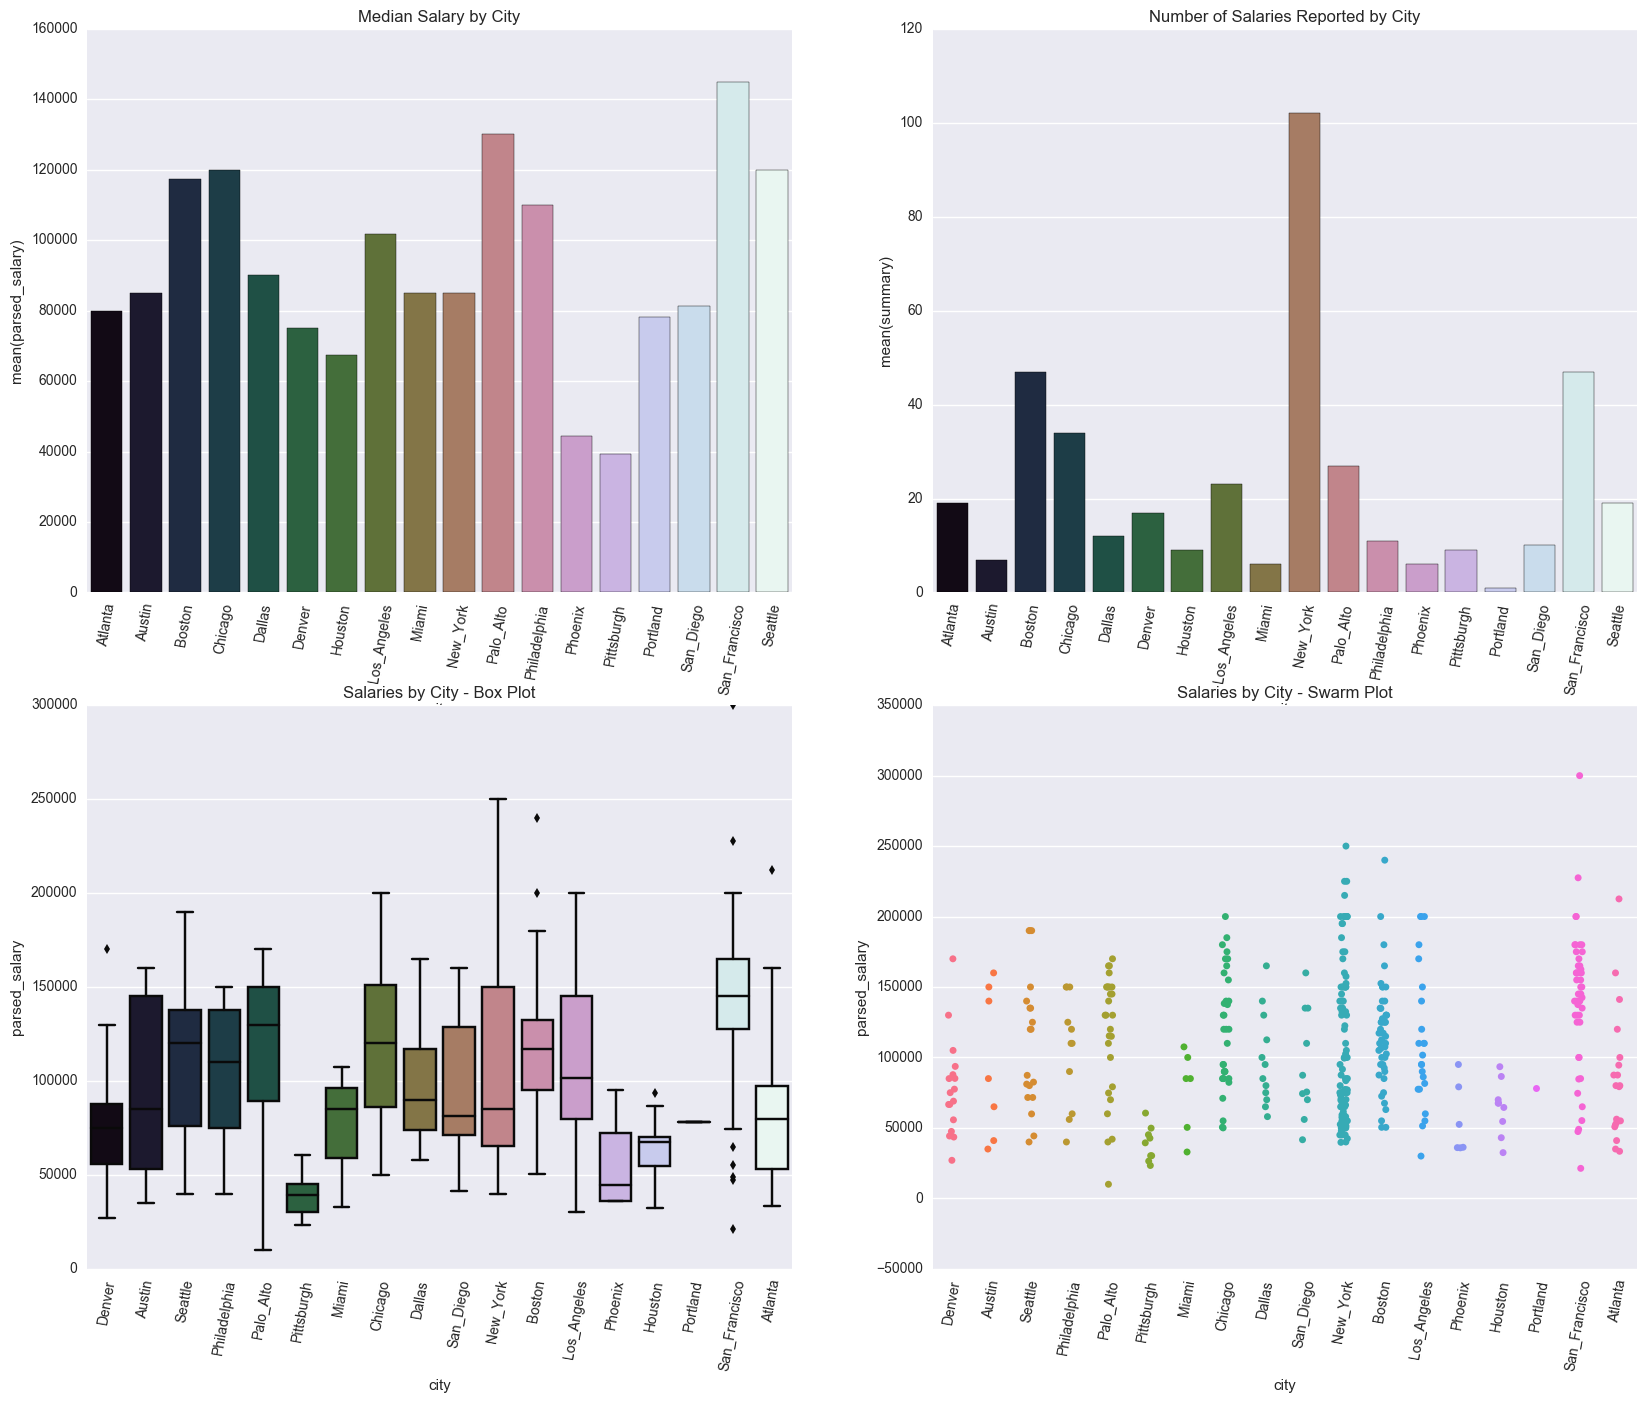

In [26]:
fig = plt.figure(figsize=(20,16))

fig.add_subplot(221)
sns.barplot('city', 'parsed_salary', data = city_groupby, palette = 'cubehelix')
plt.xticks(rotation = 80)
plt.title('Median Salary by City')

fig.add_subplot(222)
sns.barplot('city', 'summary', data = city_groupby, palette = 'cubehelix')
plt.xticks(rotation = 80)
plt.title('Number of Salaries Reported by City')

fig.add_subplot(223)
sns.boxplot('city', 'parsed_salary', data = indeed_df, palette = 'cubehelix')
plt.xticks(rotation = 80)
plt.title('Salaries by City - Box Plot')

fig.add_subplot(224)
sns.stripplot('city', 'parsed_salary', data = indeed_df, jitter = True, palette = 'husl')
plt.xticks(rotation = 80)
plt.title('Salaries by City - Swarm Plot')

plt.show()

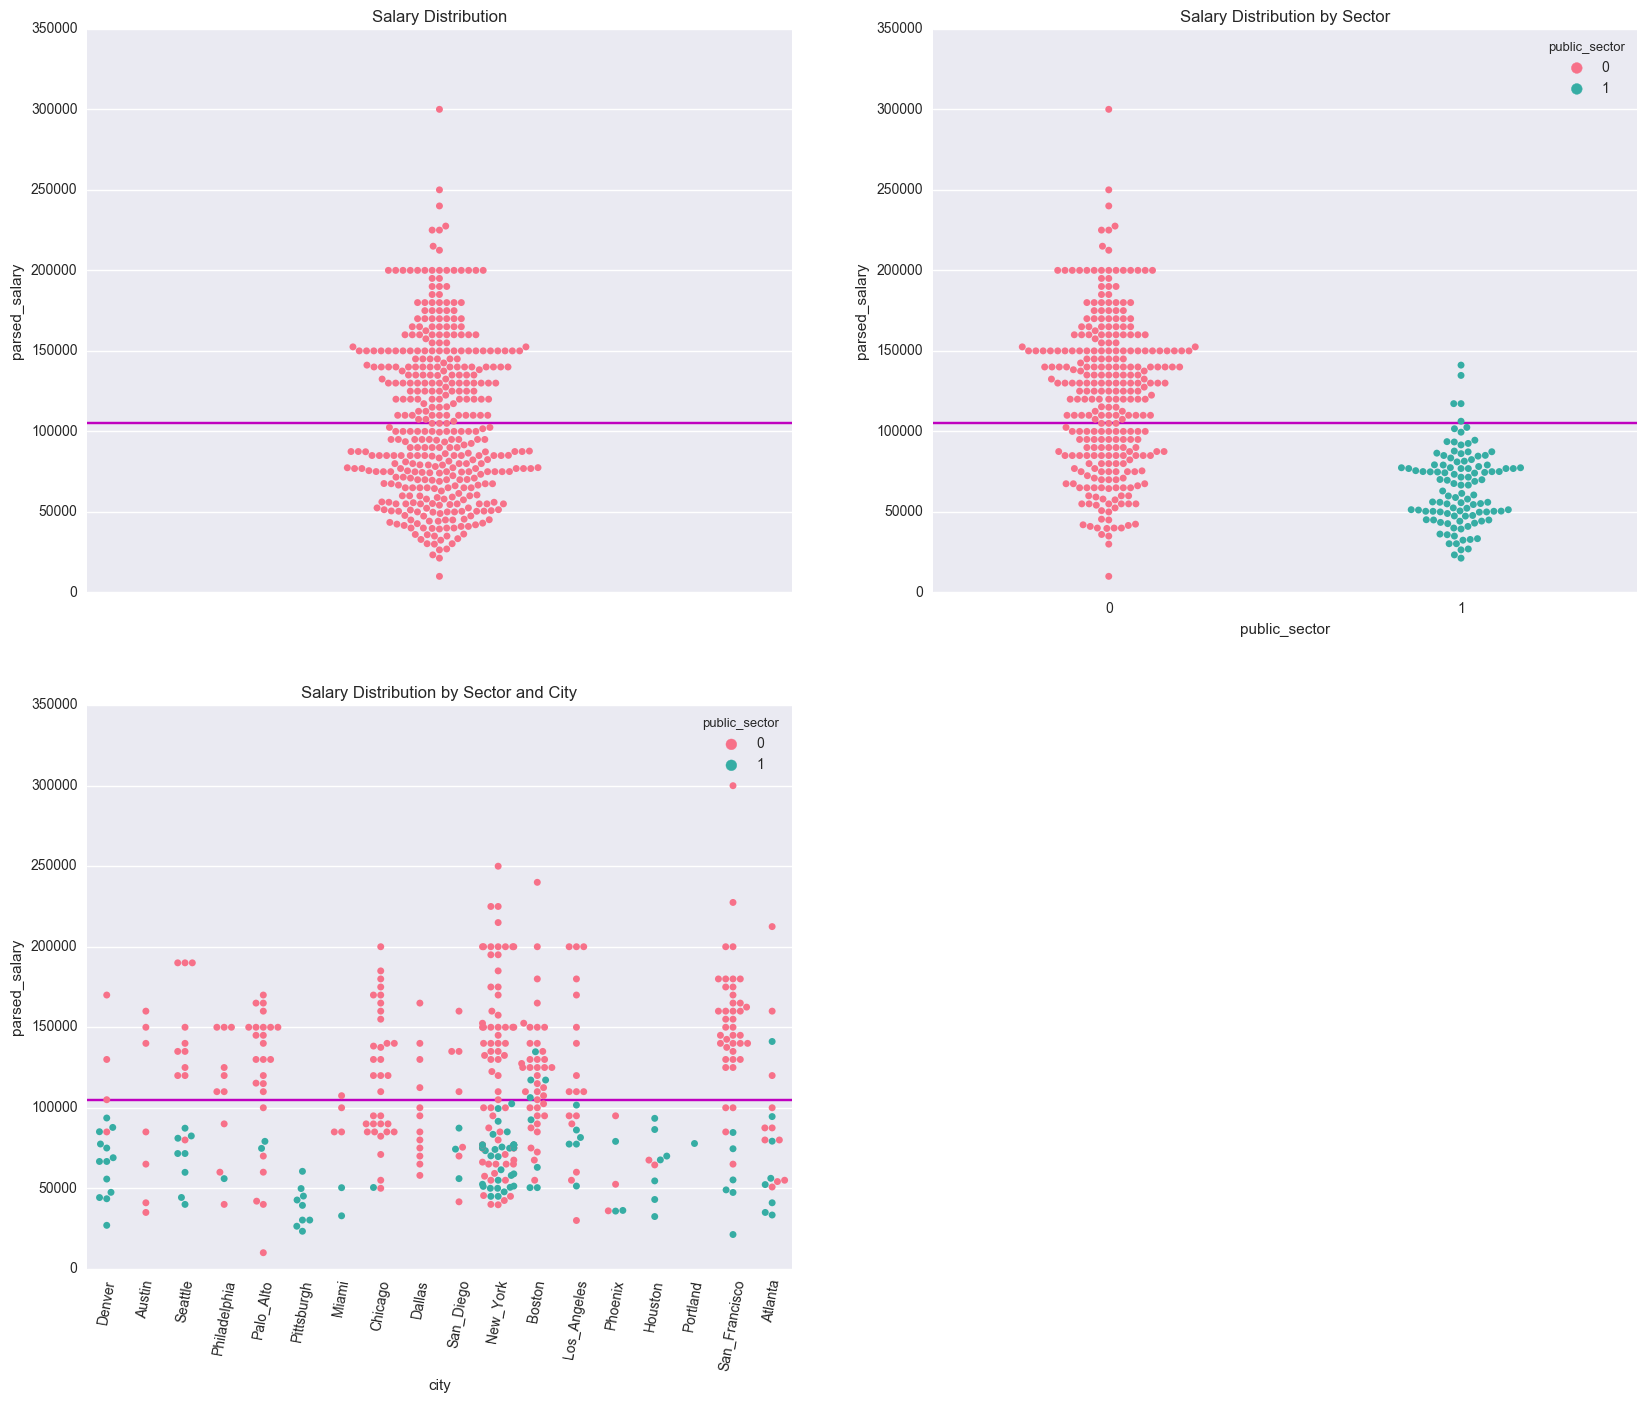

In [27]:
fig = plt.figure(figsize=(20,16))

fig.add_subplot(221)
sns.swarmplot(y = 'parsed_salary', data = indeed_df, palette = 'husl')
plt.hlines(105000, -1, 2, colors = 'm')
plt.ylim(0,350000)
plt.title('Salary Distribution')

fig.add_subplot(222)
sns.swarmplot('public_sector', 'parsed_salary', hue = 'public_sector', data = indeed_df, palette = 'husl')
plt.hlines(105000, -1, 2, colors = 'm')
plt.ylim(0,350000)
plt.title('Salary Distribution by Sector')

fig.add_subplot(223)
sns.swarmplot('city', 'parsed_salary', hue = 'public_sector', data = indeed_df, palette = 'husl')
plt.xticks(rotation = 80)
plt.hlines(105000, -1, 18, colors = 'm')
plt.ylim(0,350000)
plt.title('Salary Distribution by Sector and City')

plt.show()

In [28]:
level_list = ['manager','principal','junior','assistant','staff','associate','vp','entry',
              'senior','management','analyst','coordinator','director','mid']

In [29]:
indeed_df['level'] = ''
for i,row in indeed_df.iterrows():
    words = row['title'].split(' ')
    words.sort()
    word_list = []
    for word in words:
        if word in level_list:
            word_list.append(word)
    all_words = '_'.join(word_list)
    indeed_df.set_value(i,'level',all_words)

In [30]:
indeed_df['level'].unique()

array(['', 'analyst_senior', 'assistant', 'manager', 'assistant_manager',
       'assistant_coordinator', 'senior', 'analyst', 'coordinator',
       'entry', 'principal', 'director', 'staff', 'associate',
       'analyst_principal', 'analyst_manager', 'management_manager', 'mid',
       'analyst_analyst', 'manager_senior', 'vp', 'director_senior',
       'analyst_management', 'analyst_junior', 'assistant_senior_staff',
       'director_management', 'junior', 'junior_mid', 'management',
       'director_senior_staff', 'analyst_associate'], dtype=object)

In [31]:
indeed_level = indeed_df[indeed_df['level'] != '']
indeed_level_private = indeed_level[indeed_level['public_sector'] == 0]

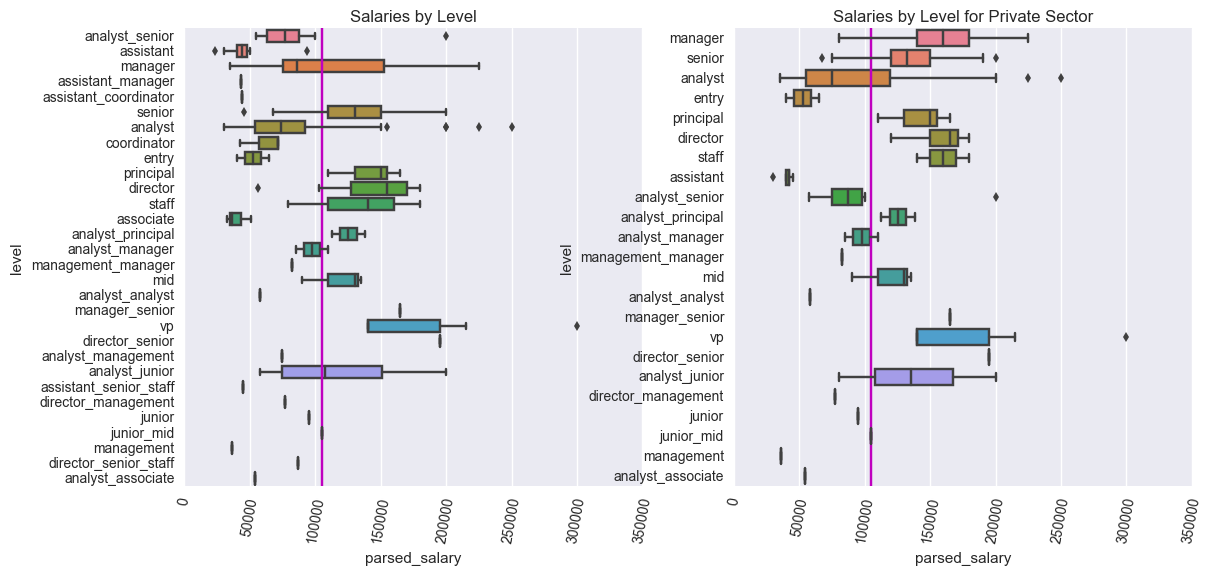

In [32]:
fig = plt.figure(figsize=(13,13))

fig.add_subplot(221)
sns.boxplot('parsed_salary', 'level', data = indeed_level, palette = 'husl')
plt.xticks(rotation = 80)
plt.vlines(105000, -1, 50, colors = 'm')
plt.xlim(0,350000)
plt.title('Salaries by Level')

fig.add_subplot(222)
sns.boxplot('parsed_salary', 'level', data = indeed_level_private, palette = 'husl')
plt.xticks(rotation = 80)
plt.vlines(105000, -1, 50, colors = 'm')
plt.xlim(0,350000)
plt.title('Salaries by Level for Private Sector')
plt.show()

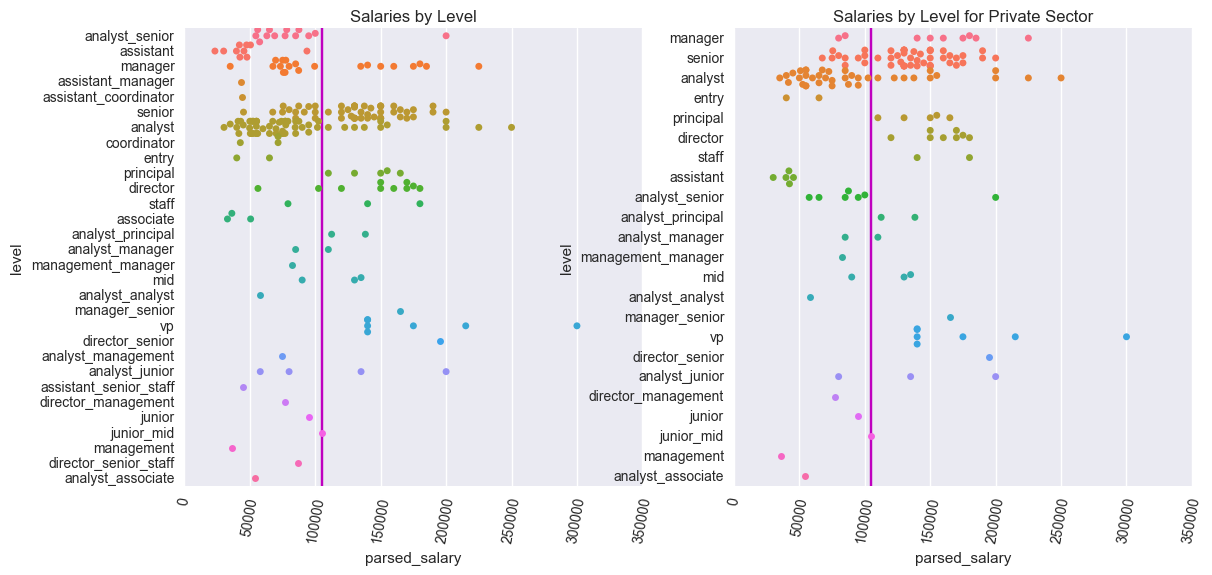

In [33]:
fig = plt.figure(figsize=(13,13))

fig.add_subplot(221)
sns.swarmplot('parsed_salary', 'level', data = indeed_level, palette = 'husl')
plt.xticks(rotation = 80)
plt.vlines(105000, -1, 50, colors = 'm')
plt.xlim(0,350000)
plt.title('Salaries by Level')

fig.add_subplot(222)
sns.swarmplot('parsed_salary', 'level', data = indeed_level_private, palette = 'husl')
plt.xticks(rotation = 80)
plt.vlines(105000, -1, 50, colors = 'm')
plt.xlim(0,350000)
plt.title('Salaries by Level for Private Sector')
plt.show()

In [34]:
level_0 = ['analyst_senior', 'assistant', 'assistant_manager', 'assistant_coordinator', 'analyst', 
           'coordinator', 'entry', 'staff', 'associate', 'management_manager', 'mid', 'analyst_junior', 
           'assistant_senior_staff', 'junior', 'junior_mid', 'analyst_associate']

level_1 = ['manager', 'senior', 'principal', 'director', 'analyst_principal', 'analyst_manager',
           'manager_senior', 'vp', 'director_senior', 'management', 'director_management', 
           'director_senior_staff']

def level_number(x):

    if x in level_0:
        return 'low_sal'
    elif x in level_1:
        return 'high_sal'
    else:
        pass
    
indeed_df['level_dummy'] = indeed_df['level'].apply(level_number)

### &nbsp; C. Algorithms and Techniques

&nbsp; &nbsp; I know that I first want to see how my model predicts the salary numbers themselves based on the least amount of data: location and sector.

&nbsp; &nbsp; Then, I'll try to find some important key words within the title, and predict salary number including that parameter.

&nbsp; &nbsp; If I'm not performing too well and have time, I'll add the summary keywords in to help predict.

&nbsp; &nbsp; Then I'll need to decide where to split my model (high/low salary earner)

### &nbsp; D. Benchmark

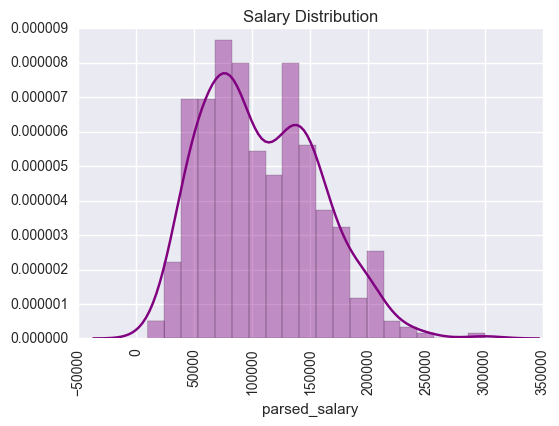

In [35]:
x = indeed_df['parsed_salary'].dropna(axis = 0)
sns.distplot(x, bins = 20, color = 'purple')
plt.title('Salary Distribution')
plt.xticks(rotation = 90)
plt.show()

I created my benchmark first by creating a histogram (see above). The histogram showed a dip and two peaks, so I decided that my division between the high and low salaries should be around that dip, which is somewhere around $105K. The median is around $100K. That also sounds reasonable to me, in terms of what I think would differentiate a salary from high/low.

#### Baseline Accuracy

In [36]:
def salary_group(x):

    if x < 105000:
        return 0
    else:
        return 1
    
indeed_df['sal_group'] = indeed_df['parsed_salary'].apply(salary_group)

In [37]:
indeed_df['sal_group'].mean()

0.4802955665024631

In [38]:
indeed_df.groupby('sal_group', as_index = False).agg({'parsed_salary': 'count'})

,sal_group,parsed_salary
0,0,211
1,1,195


My **baseline accuracy** is 52%, meaning if I chose to assign the entire dataset to the majority, low salary, then without any model, my accuracy score would be 52%.

# III. Linear Regression - Modeling

### &nbsp; A. First Attempt at Modelling: City

In [39]:
indeed_df_one_group = indeed_df[['city','parsed_salary']]

In [40]:
indeed_df_one_group = pd.get_dummies(indeed_df_one_group)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler


X = indeed_df_one_group.ix[:, indeed_df_one_group.columns != 'parsed_salary']
y = indeed_df_one_group['parsed_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)

RD = Ridge()
RD.fit(X_train, y_train)

print {'LR Train R^2': LR.score(X_train, y_train),
       'LR Test R^2': LR.score(X_test, y_test),
       'RD Train R^2': RD.score(X_train, y_train),
       'RD Test R^2': RD.score(X_test, y_test)}

{'LR Train R^2': 0.19110685857555187, 'LR Test R^2': -1.8996975296623294e+26, 'RD Train R^2': 0.19525155121081916, 'RD Test R^2': 0.12282631718416337}


Insanely low score, let's see if my sector column creation helps the model at all.

### &nbsp; B. Second Attempt at Modelling: City, Sector

In [42]:
indeed_df_two_groups = indeed_df[['city', 'public_sector', 'parsed_salary']]

In [43]:
indeed_df_two_groups = pd.get_dummies(indeed_df_two_groups)

In [44]:
X = indeed_df_two_groups.ix[:, indeed_df_two_groups.columns != 'parsed_salary']
y = indeed_df_two_groups['parsed_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)

RD = Ridge()
RD.fit(X_train, y_train)

print {'LR Train R^2': LR.score(X_train, y_train),
       'LR Test R^2': LR.score(X_test, y_test),
       'RD Train R^2': RD.score(X_train, y_train),
       'RD Test R^2': RD.score(X_test, y_test)}

{'LR Train R^2': 0.34781933283613864, 'LR Test R^2': -1.7725979964129398e+25, 'RD Train R^2': 0.34862935626358593, 'RD Test R^2': 0.33863907255270764}


Low score, but definitely an improvement with the addition of sector! So now I need to figure out a way to include the keywords in the title as a feature to predict salary.

### &nbsp; C. Third Attempt at Modelling: City, Sector, Title

In [45]:
indeed_df_three_groups = indeed_df

In [46]:
indeed_df_three_groups = pd.get_dummies(indeed_df_three_groups)

In [47]:
for col in indeed_df_three_groups:
    if 'title' in col or 'summary' in col or 'company' in col or 'salary_' in col:
        del indeed_df_three_groups[col]

In [48]:
from sklearn.linear_model import Lasso

X = indeed_df_three_groups.ix[:, indeed_df_three_groups.columns != 'parsed_salary']
y = indeed_df_three_groups['parsed_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)

RD = Ridge()
RD.fit(X_train, y_train)

L = Lasso(alpha = .0001, max_iter = 100000)
L.fit(X_train, y_train)

print {'LR Train R^2': LR.score(X_train, y_train),
       'LR Test R^2': LR.score(X_test, y_test),
       'RD Train R^2': RD.score(X_train, y_train),
       'RD Test R^2': RD.score(X_test, y_test),
       'Lasso Train R^2': L.score(X_train, y_train),
       'Lasso Test R^2': L.score(X_test, y_test)}

{'Lasso Test R^2': 0.33633944159034113, 'RD Train R^2': 0.89163862614186751, 'LR Train R^2': 0.88073498359822233, 'LR Test R^2': -1.7672020010133533e+27, 'Lasso Train R^2': 0.89168151630320802, 'RD Test R^2': 0.3875906937418}


/Users/annaheller/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Not much improvement. I'm going to try a different approach for my features on title.

In [49]:
# np.sum(abs(L.coef_) > 0.0001) OUTPUT was 339. That's far too many for me to be comfortable with this model.

In [50]:
# np.sum(abs(L.coef_) > 0.0001) OUTPUT was 162. That's getting a lot better. I think I simply need more data.

In [51]:
np.sum(abs(L.coef_) > 0.0001)

190

### &nbsp; D. Fourth Attempt at Modelling: City, Sector, Title (cleaned)

In [52]:
indeed_df_three_groups_4 = indeed_df[['city', 'public_sector', 'level_dummy', 'parsed_salary']]

In [53]:
indeed_df_three_groups_4 = pd.get_dummies(indeed_df_three_groups_4)

In [54]:
from sklearn.linear_model import Lasso

X = indeed_df_three_groups_4.ix[:, indeed_df_three_groups_4.columns != 'parsed_salary']
y = indeed_df_three_groups_4['parsed_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)

RD = Ridge()
RD.fit(X_train, y_train)

L = Lasso(alpha = .0001, max_iter = 100000)
L.fit(X_train, y_train)

print {'LR Train R^2': LR.score(X_train, y_train),
       'LR Test R^2': LR.score(X_test, y_test),
       'RD Train R^2': RD.score(X_train, y_train),
       'RD Test R^2': RD.score(X_test, y_test),
       'Lasso Train R^2': L.score(X_train, y_train),
       'Lasso Test R^2': L.score(X_test, y_test)}

{'Lasso Test R^2': 0.36816007816828089, 'RD Train R^2': 0.42806063440607778, 'LR Train R^2': 0.42806343238417494, 'LR Test R^2': 0.36764463193747199, 'Lasso Train R^2': 0.42806343238417488, 'RD Test R^2': 0.36757532481359501}


This is not helping much more than the sector classification. I'm going to move on to the logisitc regression.

# IV. Logistic Regression - Modeling

### &nbsp; A. First Attempt at Modelling: City

In [55]:
indeed_df_one_group = indeed_df[['city','sal_group']]

In [56]:
indeed_df_one_group = pd.get_dummies(indeed_df_one_group)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = indeed_df_one_group.ix[:, indeed_df_one_group.columns != 'sal_group']
y = indeed_df_one_group['sal_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LOGREG = LogisticRegression()
LOGREG.fit(X_train, y_train)

print {'Logistic Regression Train Accuracy Score': LOGREG.score(X_train, y_train),
       'Logistic Regression Test Accuracy Score': LOGREG.score(X_test, y_test)}

{'Logistic Regression Train Accuracy Score': 0.68092105263157898, 'Logistic Regression Test Accuracy Score': 0.58823529411764708}


Not a bad score just based on city--beats the initial baseline accuracy score. Now my new score to beat is approx 59%.

### &nbsp; B. Second Attempt at Modelling: City, Sector

In [58]:
indeed_df_two_groups = indeed_df[['city', 'public_sector', 'sal_group']]

In [59]:
indeed_df_two_groups = pd.get_dummies(indeed_df_two_groups)

In [60]:
X = indeed_df_two_groups.ix[:, indeed_df_two_groups.columns != 'sal_group']
y = indeed_df_two_groups['sal_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LOGREG = LogisticRegression()
LOGREG.fit(X_train, y_train)

print {'Logistic Regression Train Accuracy Score': LOGREG.score(X_train, y_train),
       'Logistic Regression Test Accuracy Score': LOGREG.score(X_test, y_test)}

{'Logistic Regression Train Accuracy Score': 0.75986842105263153, 'Logistic Regression Test Accuracy Score': 0.78431372549019607}


Getting a major improvement with the addition of sector. Now the new score to beat is 78%.

In [61]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = LOGREG.predict(X_test)

print classification_report(y_true, y_pred, target_names=['Low_Earner', 'High_Earner'])

             precision    recall  f1-score   support

 Low_Earner       0.89      0.63      0.74        49
High_Earner       0.73      0.92      0.82        53

avg / total       0.81      0.78      0.78       102



If we were to make a contingency table, our table would look like this:

|           |Low Earner|High Earner|Total|
|-----------|:--------:|:---------:|:---:|
|Low Earner |31        |18         |49   |
|High Earner|4         |49         |53   |
|Total      |35        |67         |102  |

### &nbsp; C. Third Attempt at Modelling: City, Sector, Title

In [62]:
indeed_df_three_groups = indeed_df[['city', 'public_sector', 'level_dummy', 'sal_group']]

In [63]:
indeed_df_three_groups = pd.get_dummies(indeed_df_three_groups)

In [64]:
X = indeed_df_three_groups.ix[:, indeed_df_three_groups.columns != 'sal_group']
y = indeed_df_three_groups['sal_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LOGREG = LogisticRegression()
LOGREG.fit(X_train, y_train)

print {'Logistic Regression Train Accuracy Score': LOGREG.score(X_train, y_train),
       'Logistic Regression Test Accuracy Score': LOGREG.score(X_test, y_test)}

{'Logistic Regression Train Accuracy Score': 0.81907894736842102, 'Logistic Regression Test Accuracy Score': 0.75490196078431371}


Title does not appear to help. I'll stick with city and sector.

# V. Results and Conclusion

### &nbsp; Model Evaluation and Validation

Given our data's current state, I would recommend we use our logistic regression based on city and sector. If we were to use additional features, the work to clean the title or summary would not allow for a significantly improved model (GIGO). The model predicted rather well given those two features.

We also have to consider the little data provided. In order to use title/summary as a parameter, we have to at least have more rows than parameters. If we receive more data, it would be worth looking into using additional parameters. More data will allow for a quick determination in key words as salary predictors.

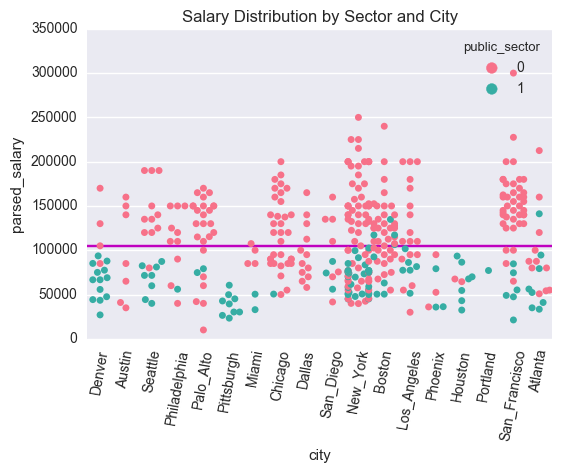

In [65]:
sns.swarmplot('city', 'parsed_salary', hue = 'public_sector', data = indeed_df, palette = 'husl')
plt.xticks(rotation = 80)
plt.hlines(105000, -1, 18, colors = 'm')
plt.ylim(0,350000)
plt.title('Salary Distribution by Sector and City')

plt.show()